<a href="https://colab.research.google.com/github/esraa9322/Denoising-Autoencoder/blob/main/Denoising_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports and installation**

In [ ]:
! pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
import os, shutil
import numpy as np
import keras 
import matplotlib.pyplot as plt

from pathlib import Path
from PIL import Image
from os import listdir
from PIL import Image
from matplotlib import image
from matplotlib import pyplot
from keras import layers

# ***Data loading and preprocessing***

In [ ]:
od.download("https://www.kaggle.com/datasets/arnaud58/landscape-pictures")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: esraayazid
Your Kaggle Key: ··········


100%|██████████| 620M/620M [00:31<00:00, 20.8MB/s]


In [ ]:
images_dir = Path('/content/landscape-pictures').expanduser()


In [ ]:
# put images into a list 
def create_list(images_dire):
    data = []
    for fname in listdir(images_dire):
      fpath = os.path.join(images_dire, fname)
      im = Image.open(fpath)
      data.append(im)
    return data


In [ ]:
data = create_list(images_dir)
print(len(data))

4319


In [ ]:
actual_data=data[:100]

In [ ]:
#Resizing
def Resize_images(real_data):
   Resized_data=[]
   for im in real_data:
     resized_image=im.resize((400,400))
     Resized_data.append(resized_image)
   return Resized_data


In [ ]:
Resized_data = Resize_images(actual_data)
print(len(Resized_data))

100


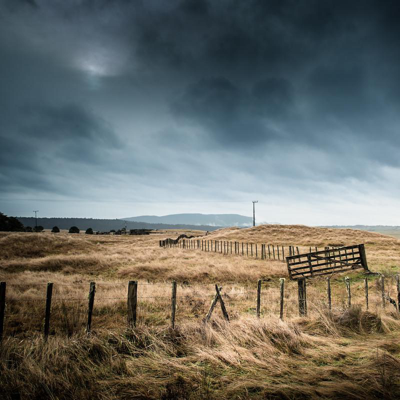

In [ ]:
Resized_data[0]

In [ ]:
Resized_data= np.stack(Resized_data)
Resized_data.shape

(100, 400, 400, 3)

In [ ]:
train_set = Resized_data[:80]
train_set.shape

(80, 400, 400, 3)

In [ ]:
test_set = Resized_data[80:100]
test_set.shape

(20, 400, 400, 3)

In [ ]:
def normalize(x):
    return np.array((x - np.min(x)) / (np.max(x) - np.min(x)))

In [ ]:
normalized_train_set=normalize(train_set)
normalized_test_set=normalize(test_set)

In [ ]:
def create_noise(data):
  noise_factor = 0.4
  noisy_array = data + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=data.shape
    )

  return np.clip(noisy_array, 0.0, 1.0)

In [ ]:
noisy_train_data=create_noise(normalized_train_set)
noisy_test_data= create_noise(normalized_test_set)

In [ ]:
def display(array1, array2,n):
  
    

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(400, 400,3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(400, 400,3))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

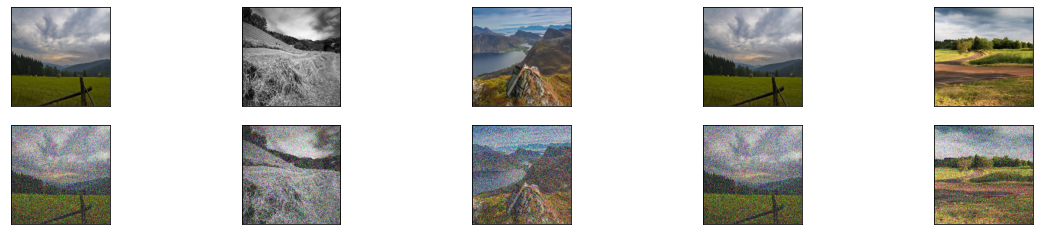

In [ ]:
display(test_set,noisy_test_data,5)

# **First autoencoder**

In [ ]:
input_img = keras.Input(shape=(400, 400, 3))


In [ ]:
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(3, (3, 3), activation='relu', padding='same')(x)

encoded = x


x = layers.Conv2DTranspose(8, (3, 3), strides=(2,2), activation='relu', padding='same')(encoded)
x = layers.Conv2DTranspose(8, (3, 3), strides=(2,2), activation='relu', padding='same')(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)



In [ ]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 400, 400, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 400, 400, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 200, 200, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 8)       1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 100, 100, 8)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 100, 3)       219   

In [ ]:
autoencoder.fit(normalized_train_set, normalized_train_set,
                epochs=200,
                batch_size=32,
                shuffle=True,
                validation_data=(normalized_test_set, normalized_test_set))

Epoch 1/200
3/3 [==============================] - 2s 808ms/step - loss: 0.6929 - val_loss: 0.6927
Epoch 2/200
3/3 [==============================] - 1s 187ms/step - loss: 0.6925 - val_loss: 0.6923
Epoch 3/200
3/3 [==============================] - 1s 179ms/step - loss: 0.6920 - val_loss: 0.6918
Epoch 4/200
3/3 [==============================] - 1s 180ms/step - loss: 0.6915 - val_loss: 0.6913
Epoch 5/200
3/3 [==============================] - 1s 182ms/step - loss: 0.6907 - val_loss: 0.6905
Epoch 6/200
3/3 [==============================] - 1s 181ms/step - loss: 0.6899 - val_loss: 0.6896
Epoch 7/200
3/3 [==============================] - 1s 186ms/step - loss: 0.6887 - val_loss: 0.6884
Epoch 8/200
3/3 [==============================] - 1s 176ms/step - loss: 0.6871 - val_loss: 0.6868
Epoch 9/200
3/3 [==============================] - 1s 176ms/step - loss: 0.6852 - val_loss: 0.6845
Epoch 10/200
3/3 [==============================] - 1s 184ms/step - loss: 0.6824 - val_loss: 0.6816
Epoch 11/

1/1 [==============================] - 0s 165ms/step


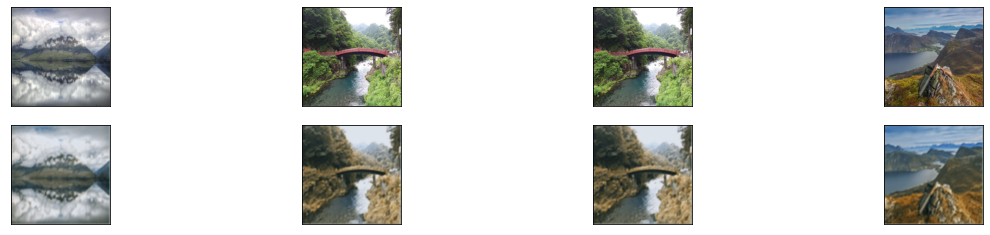

In [ ]:
predictions = autoencoder.predict(normalized_test_set)
display(normalized_test_set, predictions,4)

# ***Preparing test images***

In [ ]:
test_images_dir = Path('/content/Cats').expanduser()
test_images_dir


PosixPath('/content/Cats')

In [ ]:
test_data = create_list(test_images_dir)
print(len(test_data))

3


In [ ]:
test_data = Resize_images(test_data)

In [ ]:
test_data = np.stack(test_data)

In [ ]:
test_data = normalize(test_data)

In [ ]:
noisy_test_out_data= create_noise(test_data)

1/1 [==============================] - 0s 18ms/step


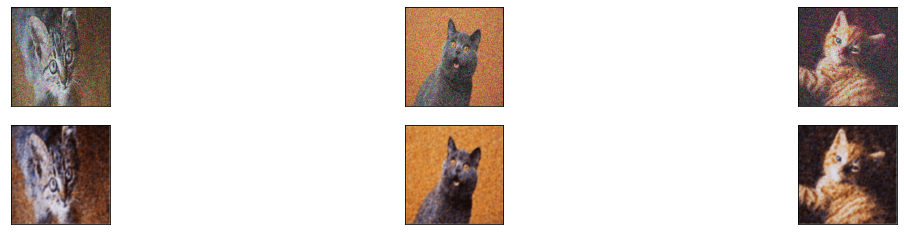

In [ ]:
predictions = autoencoder.predict(noisy_test_out_data)
display(noisy_test_out_data, predictions,3)

# **First autoencoder , second method**

In [ ]:
####second method
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(test_data)

1/1 [==============================] - 0s 46ms/step


In [ ]:
noisy_test_out = create_noise(encoded_imgs)

In [ ]:
noisy_test_out.shape

(3, 100, 100, 3)

In [ ]:
noisy_encoded_input = keras.Input(shape=(100, 100, 3))

In [ ]:
x = layers.Conv2DTranspose(8, (3, 3), strides=(2,2), activation='relu', padding='same')(noisy_encoded_input)
x = layers.Conv2DTranspose(8, (3, 3), strides=(2,2), activation='relu', padding='same')(x)
last = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

decoder = keras.Model(noisy_encoded_input, last)
decoder.compile(optimizer='adam', loss='binary_crossentropy')
decoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 200, 200, 8)      224       
 ranspose)                                                       
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 400, 400, 8)      584       
 ranspose)                                                       
                                                                 
 conv2d_4 (Conv2D)           (None, 400, 400, 3)       219       
                                                                 
Total params: 1,027
Trainable params: 1,027
Non-trainable params: 0
_________________________________________________________________


In [ ]:
k = 0
for i in range (6,12):
    decoder.weights[k].assign(autoencoder.weights[i])
    k = k+1

In [ ]:
decoded_imgs = decoder.predict(noisy_test_out) 

1/1 [==============================] - 0s 57ms/step


In [ ]:
decoded_imgs.shape

(3, 400, 400, 3)

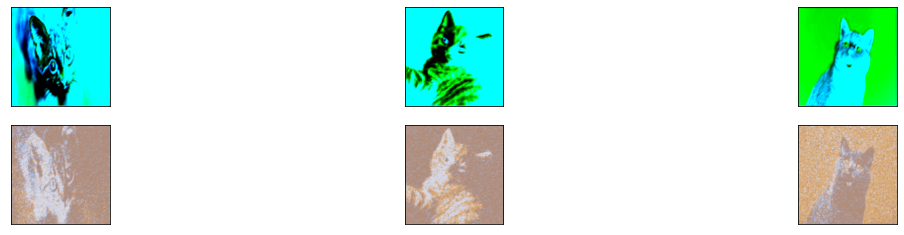

In [ ]:
n = 3  
plt.figure(figsize=(20, 4))
for i in range(n):
    
    
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(encoded_imgs[i].reshape(100, 100,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

   
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(400, 400,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# **Second Autoencoder**

In [ ]:
input_img = keras.Input(shape=(400, 400, 3))

In [ ]:
x = layers.Conv2D(80, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(3, (3, 3), activation='relu', padding='same')(x)

encoded = x


x = layers.Conv2DTranspose(8, (3, 3), strides=(2,2), activation='relu', padding='same')(encoded)
x = layers.Conv2DTranspose(8, (3, 3), strides=(2,2), activation='relu', padding='same')(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)


In [ ]:
autoencoder1 = keras.Model(input_img, decoded)
autoencoder1.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder1.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 400, 400, 3)]     0         
                                                                 
 conv2d_5 (Conv2D)           (None, 400, 400, 80)      2240      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 200, 200, 80)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 200, 200, 32)      23072     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 100, 100, 3)       867 

In [ ]:
autoencoder1.fit(normalized_train_set, normalized_train_set,
                epochs=200,
                batch_size=32,
                shuffle=True,
                validation_data=(normalized_test_set, normalized_test_set))

Epoch 1/200
3/3 [==============================] - 1s 360ms/step - loss: 0.5881 - val_loss: 0.5932
Epoch 2/200
3/3 [==============================] - 1s 323ms/step - loss: 0.5879 - val_loss: 0.5930
Epoch 3/200
3/3 [==============================] - 1s 309ms/step - loss: 0.5877 - val_loss: 0.5929
Epoch 4/200
3/3 [==============================] - 1s 322ms/step - loss: 0.5875 - val_loss: 0.5927
Epoch 5/200
3/3 [==============================] - 1s 321ms/step - loss: 0.5873 - val_loss: 0.5926
Epoch 6/200
3/3 [==============================] - 1s 315ms/step - loss: 0.5871 - val_loss: 0.5924
Epoch 7/200
3/3 [==============================] - 1s 317ms/step - loss: 0.5869 - val_loss: 0.5923
Epoch 8/200
3/3 [==============================] - 1s 311ms/step - loss: 0.5868 - val_loss: 0.5921
Epoch 9/200
3/3 [==============================] - 1s 322ms/step - loss: 0.5866 - val_loss: 0.5922
Epoch 10/200
3/3 [==============================] - 1s 324ms/step - loss: 0.5866 - val_loss: 0.5918
Epoch 11/

1/1 [==============================] - 0s 43ms/step


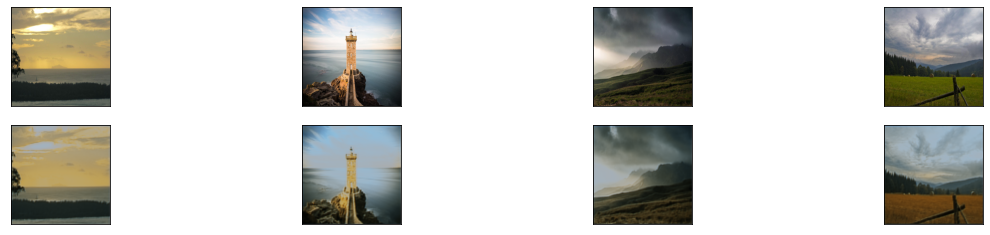

In [ ]:
predictions = autoencoder1.predict(normalized_test_set)
display(normalized_test_set, predictions,4)

1/1 [==============================] - 0s 380ms/step


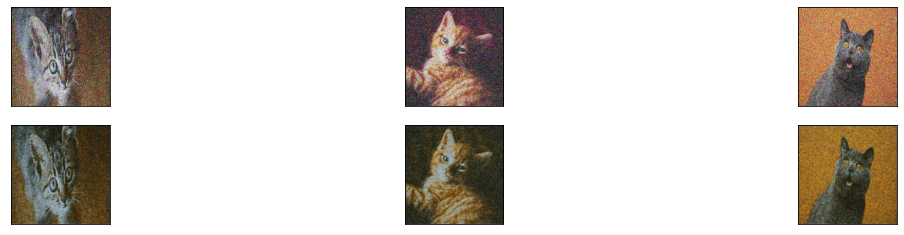

In [ ]:
predictions = autoencoder1.predict(noisy_test_out_data)
display(noisy_test_out_data, predictions,3)

# **Second method**

In [ ]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(test_data)

1/1 [==============================] - 0s 54ms/step


In [ ]:
x = layers.Conv2DTranspose(8, (3, 3), strides=(2,2), activation='relu', padding='same')(noisy_encoded_input)
x = layers.Conv2DTranspose(8, (3, 3), strides=(2,2), activation='relu', padding='same')(x)
last = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

decoder = keras.Model(noisy_encoded_input, last)
decoder.compile(optimizer='adam', loss='binary_crossentropy')
decoder.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_transpose_6 (Conv2DT  (None, 200, 200, 8)      224       
 ranspose)                                                       
                                                                 
 conv2d_transpose_7 (Conv2DT  (None, 400, 400, 8)      584       
 ranspose)                                                       
                                                                 
 conv2d_9 (Conv2D)           (None, 400, 400, 3)       219       
                                                                 
Total params: 1,027
Trainable params: 1,027
Non-trainable params: 0
_________________________________________________________________


In [ ]:
k = 0
for i in range (6,12):
    decoder.weights[k].assign(autoencoder1.weights[i])
    k = k+1

In [ ]:
decoded_imgs = decoder.predict(noisy_test_out)

1/1 [==============================] - 0s 66ms/step


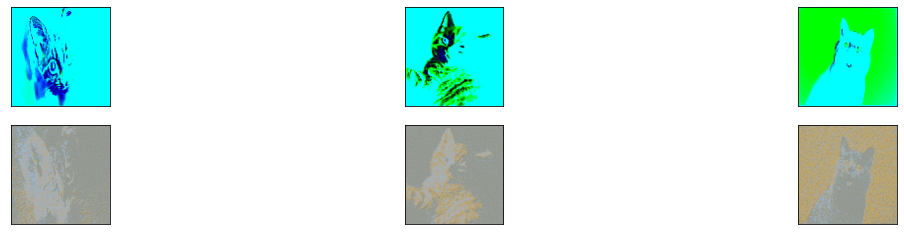

In [ ]:
n = 3  
plt.figure(figsize=(20, 4))
for i in range(n):
    
    
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(encoded_imgs[i].reshape(100, 100,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

   
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(400, 400,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()